In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats



In [23]:
df = pd.read_csv("C:\\Users\\Lenovo\\Downloads\\heart.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [25]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [26]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [27]:
df.duplicated().sum()

0

In [28]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


Searching for Balance in Categorical Data  

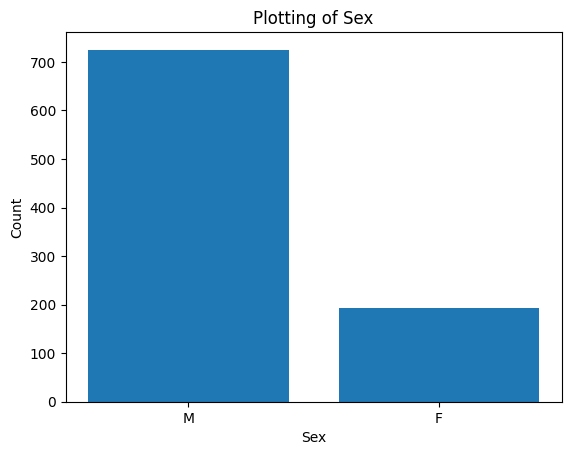

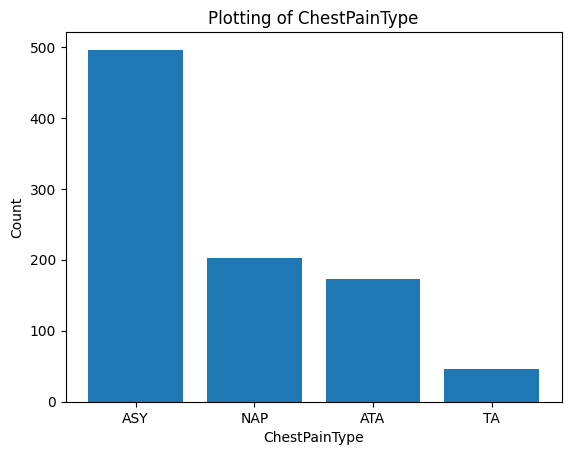

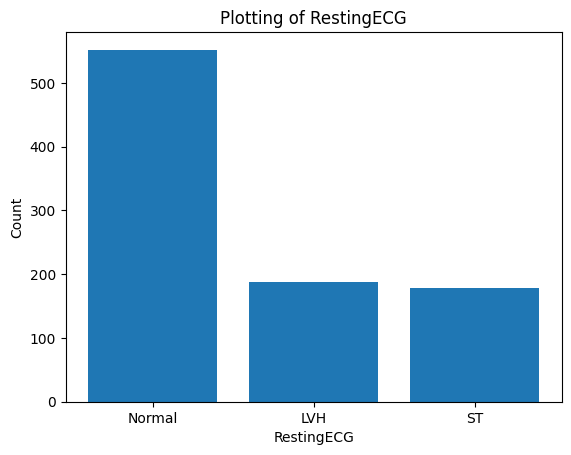

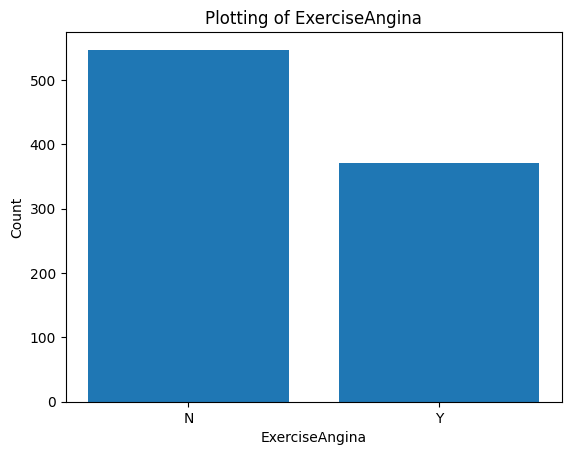

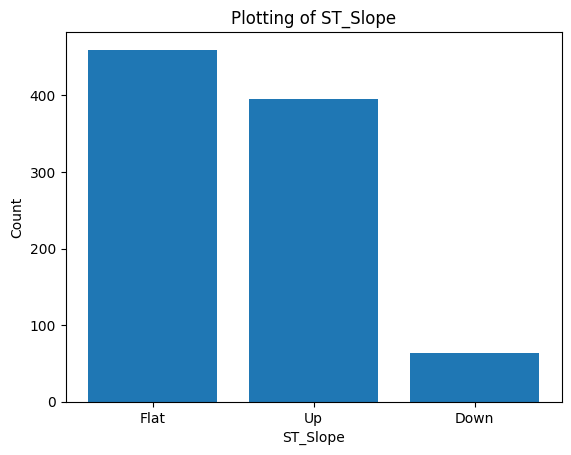

In [29]:
for column in df.select_dtypes(include=['object', 'category']).columns:
        counts = df[column].value_counts()
        plt.bar(counts.index, counts)
        plt.xlabel(column)
        plt.ylabel('Count')
        plt.title(f'Plotting of {column}')
        plt.show()


Checking balance in numeric columns

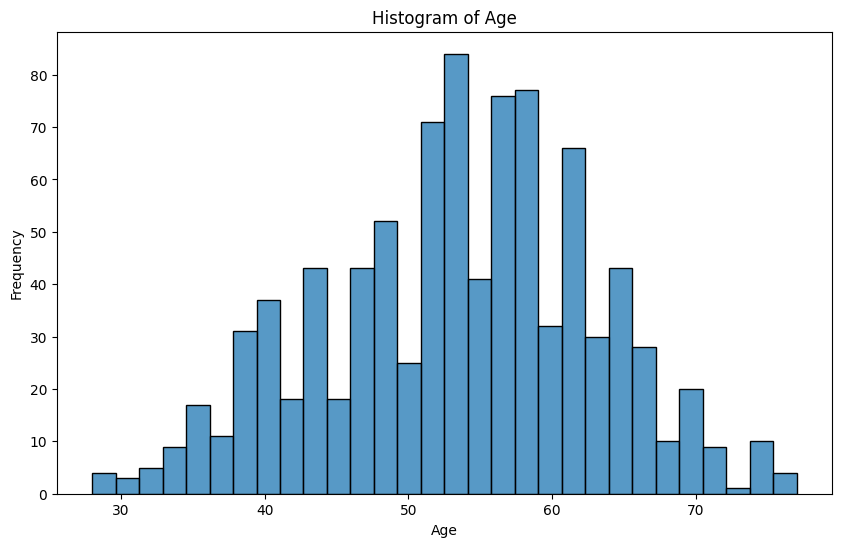

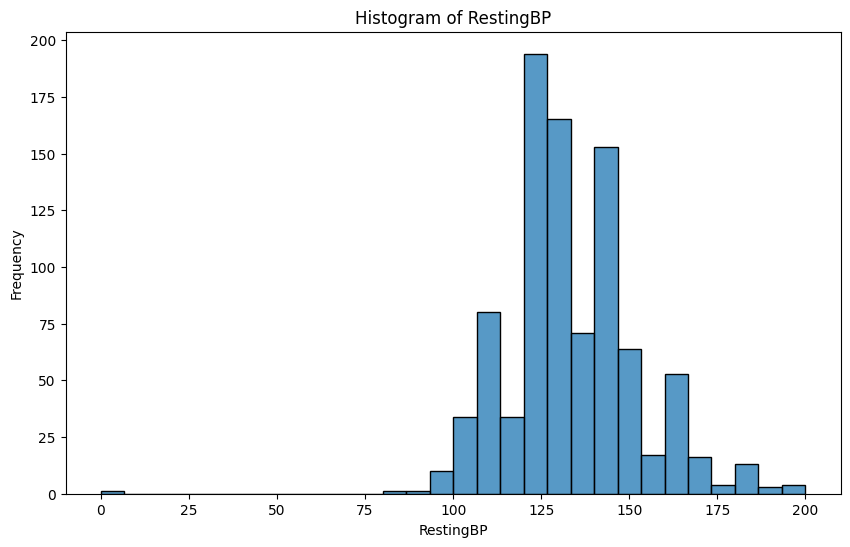

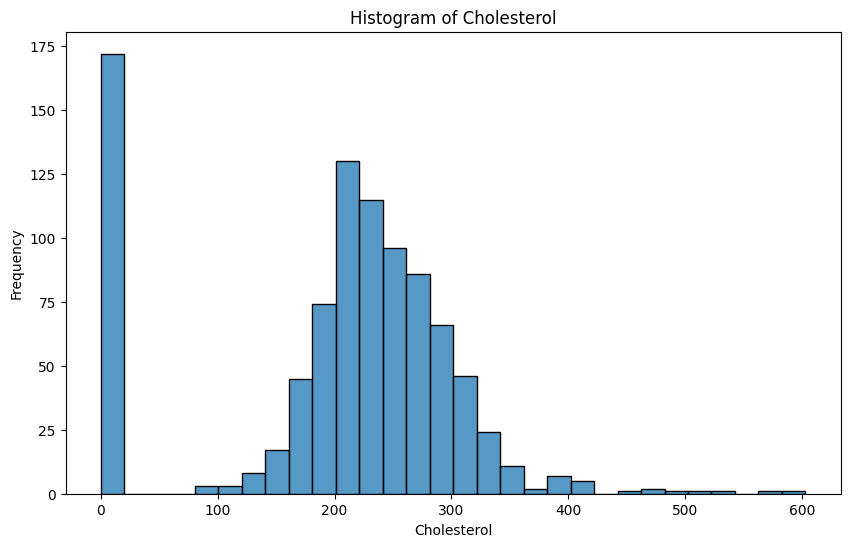

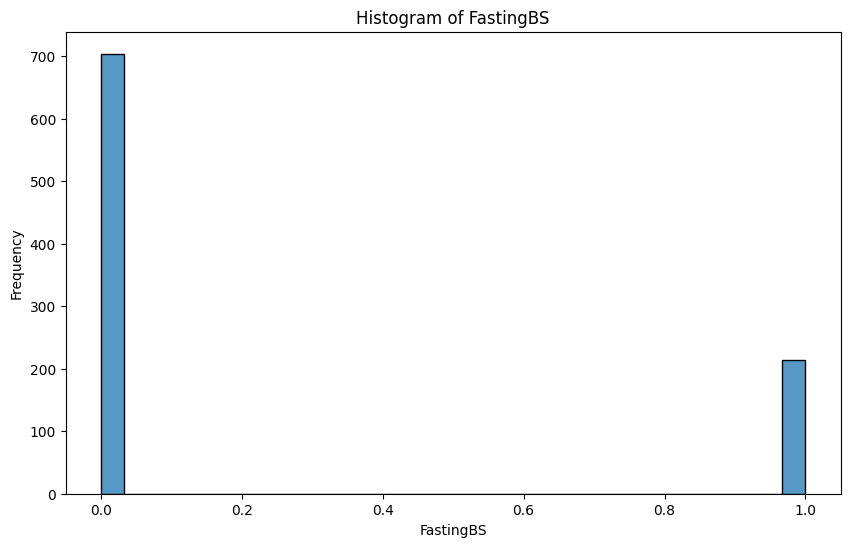

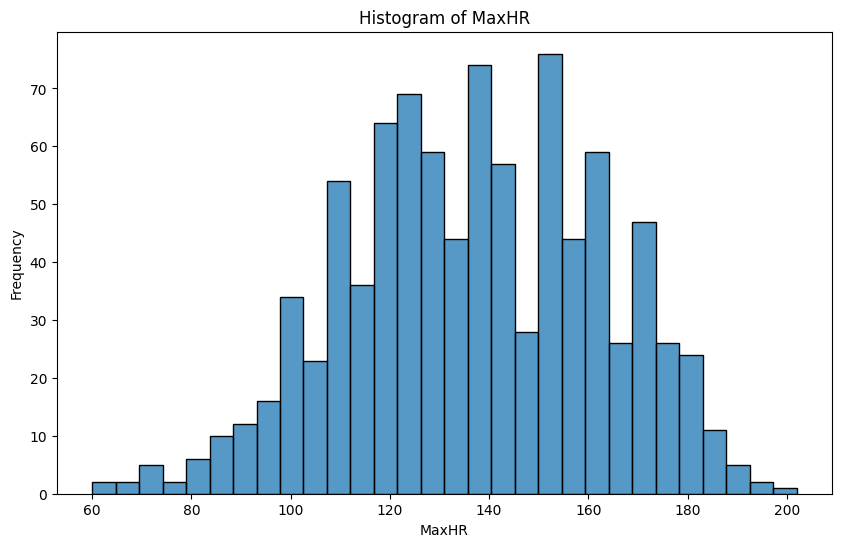

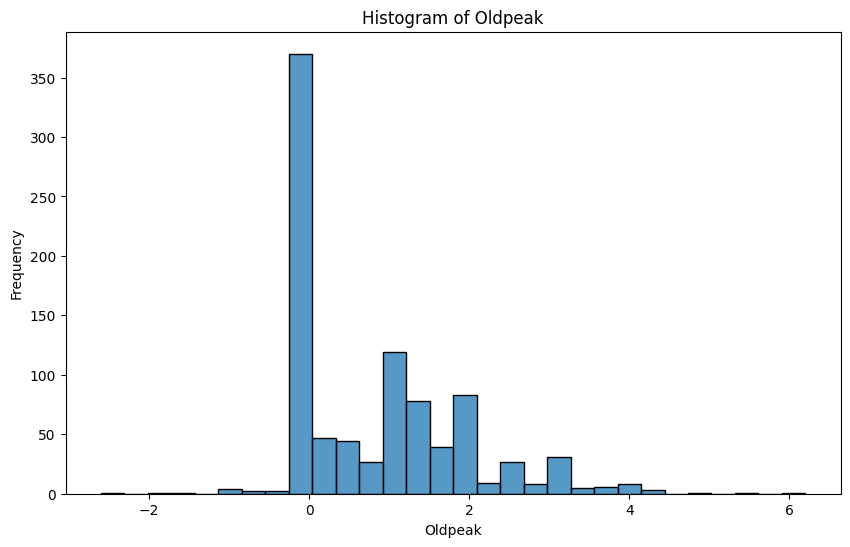

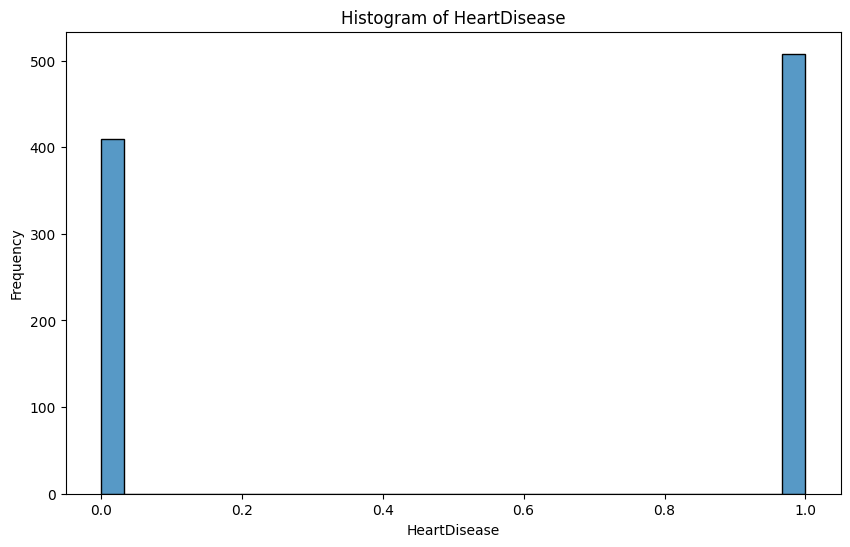

In [30]:
for column in df.select_dtypes(include=['float64', 'int64']).columns:

    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=False, bins=30)
    plt.title('Histogram of ' + column)
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

Statistical Methods For checking balance 

In [35]:
#Chisquare for numeric columns

for i in df.select_dtypes(include=['float64', 'int64']).columns:


    contingency_table = pd.crosstab(df[i], df['HeartDisease'])

# Perform Chi-squared test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-squared test results for {i} and the target column:", "Chi2 =", chi2, ", P-value =", p)
    print("\n")


#Note for me : if P-value<=0, then reject the NUll hypothesis
                #else accept NULL hypothesis

Chi-squared test results for Age and the target column: Chi2 = 125.36566669222647 , P-value = 1.2816474437527366e-08


Chi-squared test results for RestingBP and the target column: Chi2 = 93.64112634840396 , P-value = 0.014257537302956015


Chi-squared test results for Cholesterol and the target column: Chi2 = 332.18853522591183 , P-value = 1.8599475861266911e-06


Chi-squared test results for FastingBS and the target column: Chi2 = 64.3206790933594 , P-value = 1.0573018731809955e-15


Chi-squared test results for MaxHR and the target column: Chi2 = 241.3205950076166 , P-value = 1.7219219833981512e-10


Chi-squared test results for Oldpeak and the target column: Chi2 = 230.50778751189782 , P-value = 2.520630103639275e-24


Chi-squared test results for HeartDisease and the target column: Chi2 = 913.9583473327997 , P-value = 9.067122948264876e-201




In [39]:
#Anova for Categorical columns

for x in df.select_dtypes(include=['object']):

    group1 = df[df['HeartDisease'] == 'yes'][x]
    group2 = df[df['HeartDisease'] == 'no'][x]

    # Perform ANOVA
    f_val, p_val = stats.f_oneway(group1, group2)
    print(f"ANOVA results for {x}: F =", f_val, ", P =", p_val)
    print("\n")


ANOVA results for Sex: F = nan , P = nan


ANOVA results for ChestPainType: F = nan , P = nan


ANOVA results for RestingECG: F = nan , P = nan


ANOVA results for ExerciseAngina: F = nan , P = nan


ANOVA results for ST_Slope: F = nan , P = nan




c:\Users\Lenovo\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_py.py:4102: DegenerateDataWarning: at least one input has length 0
  if _f_oneway_is_too_small(samples):


Checking for outliers